# Making Noise Patches

currently too much overlap with [characterizing_noise_patches.ipynb](characterizing_noise_patches.ipynb), consider absorbing this one into that

The purpose of this notebook is to make noise patches from different sized FOVS and measure their changing NPS

In [1]:
from pathlib import Path
import numpy as np
import seaborn as sns

import sys
sys.path.append('../..')

sns.set_theme()
sns.set_style('white')

from nps_utils import compute_nps, radial_profile

In [2]:
import pandas as pd

In [3]:
base_dir = Path('/gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/CCT189_peds')
meta = pd.read_csv(base_dir / 'metadata.csv')
meta

Name  effective diameter (cm)  Dose [%]              recon  \
0    35.0 cm MITA-LCD                     35.0        10  RED-CNN augmented   
1    35.0 cm MITA-LCD                     35.0        10            RED-CNN   
2    35.0 cm MITA-LCD                     35.0        10                fbp   
3    35.0 cm MITA-LCD                     35.0        40  RED-CNN augmented   
4    35.0 cm MITA-LCD                     35.0        40            RED-CNN   
..                ...                      ...       ...                ...   
373   15.1 cm uniform                     15.1        70            RED-CNN   
374   15.1 cm uniform                     15.1        70                fbp   
375   15.1 cm uniform                     15.1        85  RED-CNN augmented   
376   15.1 cm uniform                     15.1        85            RED-CNN   
377   15.1 cm uniform                     15.1        85                fbp   

      phantom                                               file  
0    MITA-LCD  diameter350mm/signal_present/dose_010/RED-CNN ...  
1    MITA-LCD  diameter350mm/signal_present/dose_010/RED-CNN/...  
2    MITA-LCD  diameter350mm/signal_present/dose_010/fbp/sign...  
3    MITA-LCD  diameter350mm/signal_present/dose_040/RED-CNN ...  
4    MITA-LCD  diameter350mm/signal_present/dose_040/RED-CNN/...  
..        ...                                                ...  
373   uniform  diameter151mm/signal_absent/dose_070/RED-CNN/s...  
374   uniform  diameter151mm/signal_absent/dose_070/fbp/signa...  
375   uniform  diameter151mm/signal_absent/dose_085/RED-CNN a...  
376   uniform  diameter151mm/signal_absent/dose_085/RED-CNN/s...  
377   uniform  diameter151mm/signal_absent/dose_085/fbp/signa...  

[378 rows x 6 columns]

In [94]:
sys.path.append('..')
from utils import pediatric_subgroup

In [95]:
meta['pediatric subgroup'] = meta['effective diameter (cm)'].apply(pediatric_subgroup)
meta

Name  effective diameter (cm)  Dose [%]              recon  \
0    35.0 cm MITA-LCD                     35.0        10  RED-CNN augmented   
1    35.0 cm MITA-LCD                     35.0        10            RED-CNN   
2    35.0 cm MITA-LCD                     35.0        10                fbp   
3    35.0 cm MITA-LCD                     35.0        40  RED-CNN augmented   
4    35.0 cm MITA-LCD                     35.0        40            RED-CNN   
..                ...                      ...       ...                ...   
373   15.1 cm uniform                     15.1        70            RED-CNN   
374   15.1 cm uniform                     15.1        70                fbp   
375   15.1 cm uniform                     15.1        85  RED-CNN augmented   
376   15.1 cm uniform                     15.1        85            RED-CNN   
377   15.1 cm uniform                     15.1        85                fbp   

      phantom                                               file  \
0    MITA-LCD  diameter350mm/signal_present/dose_010/RED-CNN ...   
1    MITA-LCD  diameter350mm/signal_present/dose_010/RED-CNN/...   
2    MITA-LCD  diameter350mm/signal_present/dose_010/fbp/sign...   
3    MITA-LCD  diameter350mm/signal_present/dose_040/RED-CNN ...   
4    MITA-LCD  diameter350mm/signal_present/dose_040/RED-CNN/...   
..        ...                                                ...   
373   uniform  diameter151mm/signal_absent/dose_070/RED-CNN/s...   
374   uniform  diameter151mm/signal_absent/dose_070/fbp/signa...   
375   uniform  diameter151mm/signal_absent/dose_085/RED-CNN a...   
376   uniform  diameter151mm/signal_absent/dose_085/RED-CNN/s...   
377   uniform  diameter151mm/signal_absent/dose_085/fbp/signa...   

    pediatric subgroup  
0                adult  
1                adult  
2                adult  
3                adult  
4                adult  
..                 ...  
373            newborn  
374            newborn  
375            newborn  
376            newborn  
377            newborn  

[378 rows x 7 columns]

In [98]:
meta[meta['pediatric subgroup'] == 'child']['effective diameter (cm)'].unique()

array([20. , 21.6])

In [4]:
from make_noise_patches import prep_patches
patch_size = (64, 64)
dpediatric_subgroupir = Path('/gpfs_projects/brandon.nelson/PediatricCTSizeDataAugmentation/CCT189_peds/')
noise_patch_dict = prep_patches(datadir, patch_size=patch_size)

extracting noise patches...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.09it/s]


In [168]:
prep_patches?

Signature: prep_patches(datadir, dose=100, patch_size=(30, 30))
Docstring: <no docstring>
File:      ~/Dev/PediatricCTSizeAugmentation/make_noise_patches.py
Type:      function

In [5]:

from make_noise_patches import load_mhd

## uniform water phantom scans

Let's look at the phantoms scans of the uniform water phantoms, 200 repeat simulations were performed each with unique projection domain noise instances. No

In [6]:
import matplotlib.pyplot as plt
def ctshow(im, vmin=None, vmax=None):
    plt.subplots(1,1, dpi=300)
    im = plt.imshow(im,cmap='gray', vmin=vmin, vmax=vmax)
    plt.colorbar(im, fraction=0.015, pad=0.01, label='HU')
    plt.axis('off')

Text(0.5, 1.0, '[11.2, 21.6, 29.2] mm')

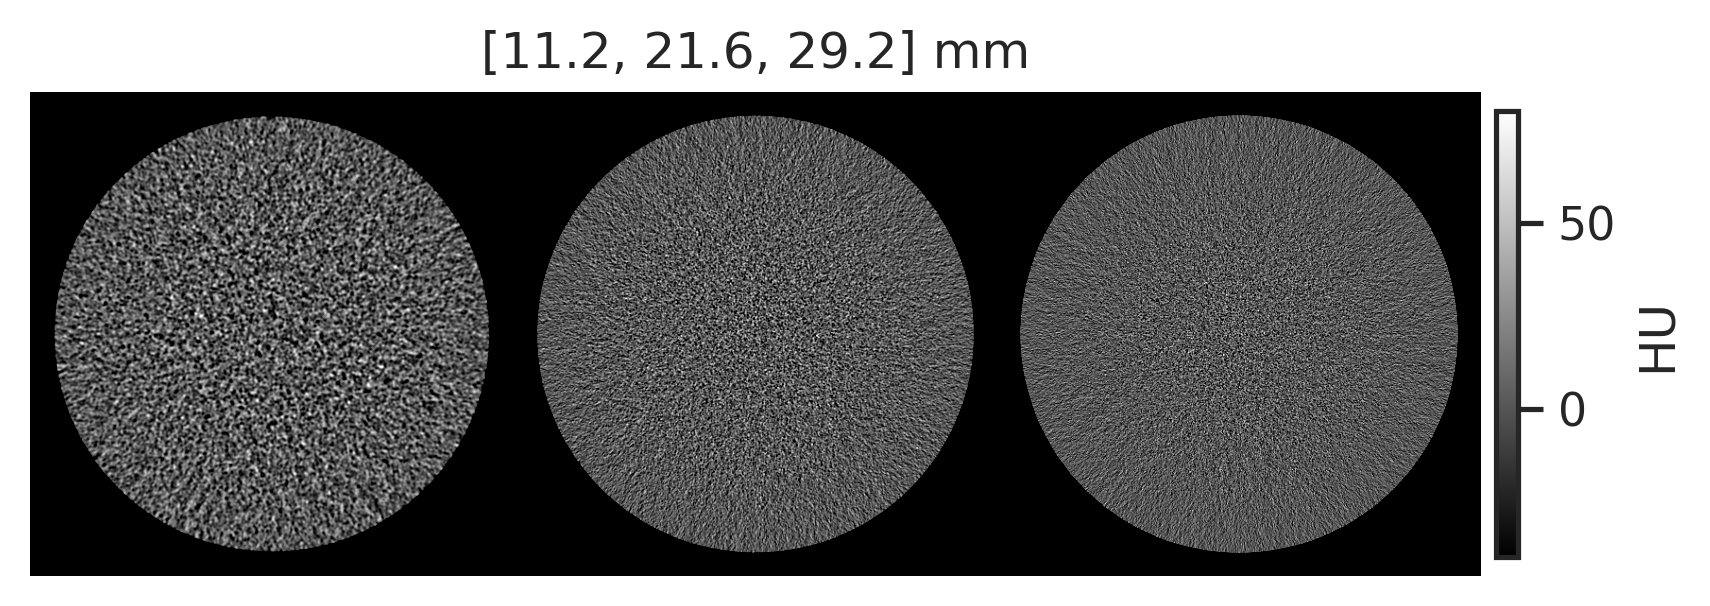

In [99]:
import matplotlib.pyplot as plt
diams = [11.2, 21.6, 29.2]
kernel='fbp'
dose=100
ctshow(np.concatenate([load_mhd(base_dir/meta[(meta.recon==kernel) &
                                        (meta.phantom=='uniform') &
                                        (meta['Dose [%]']==dose) &
                                        (meta['effective diameter (cm)']==d)].file.item())[0]-1000 for d in diams],
                      axis=1),vmin=-40, vmax=80)
plt.title(f'{diams} mm')

In [109]:
vol = load_mhd(base_dir/meta[(meta.recon==kernel) &
                                        (meta.phantom=='uniform') &
                                        (meta['Dose [%]']==dose) &
                                        (meta['effective diameter (cm)']==11.2)].file.item())[0]-1000

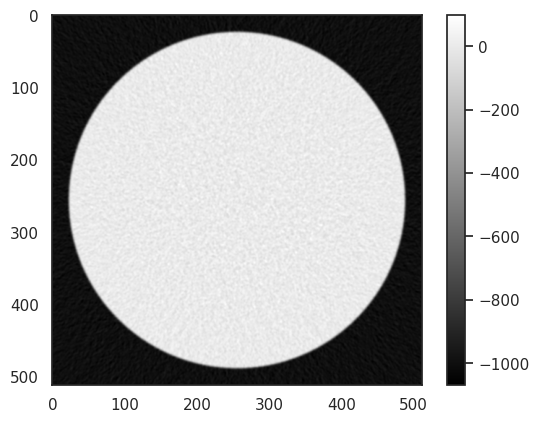

In [134]:
plt.imshow(vol, cmap='gray')
plt.colorbar()

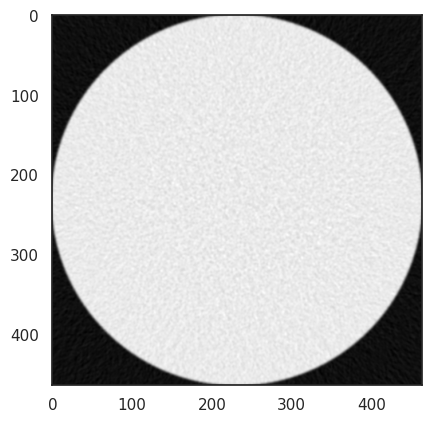

In [133]:
thresh = -950
vol_crop = vol[:, vol.mean(axis=1) > thresh]
vol_crop = vol_crop[vol.mean(axis=0) > thresh, :]
plt.imshow(vol_crop, cmap='gray')

In [29]:
from make_noise_patches import make_noise_image_dict
noise_image_dict = make_noise_image_dict(datadir, kernel='fbp')

## Now look at noise images

In [31]:
diams = [11.2, 15.1, 29.2, 35.0]
nps_images = [compute_nps(noise_image_dict[d]) for d in diams]

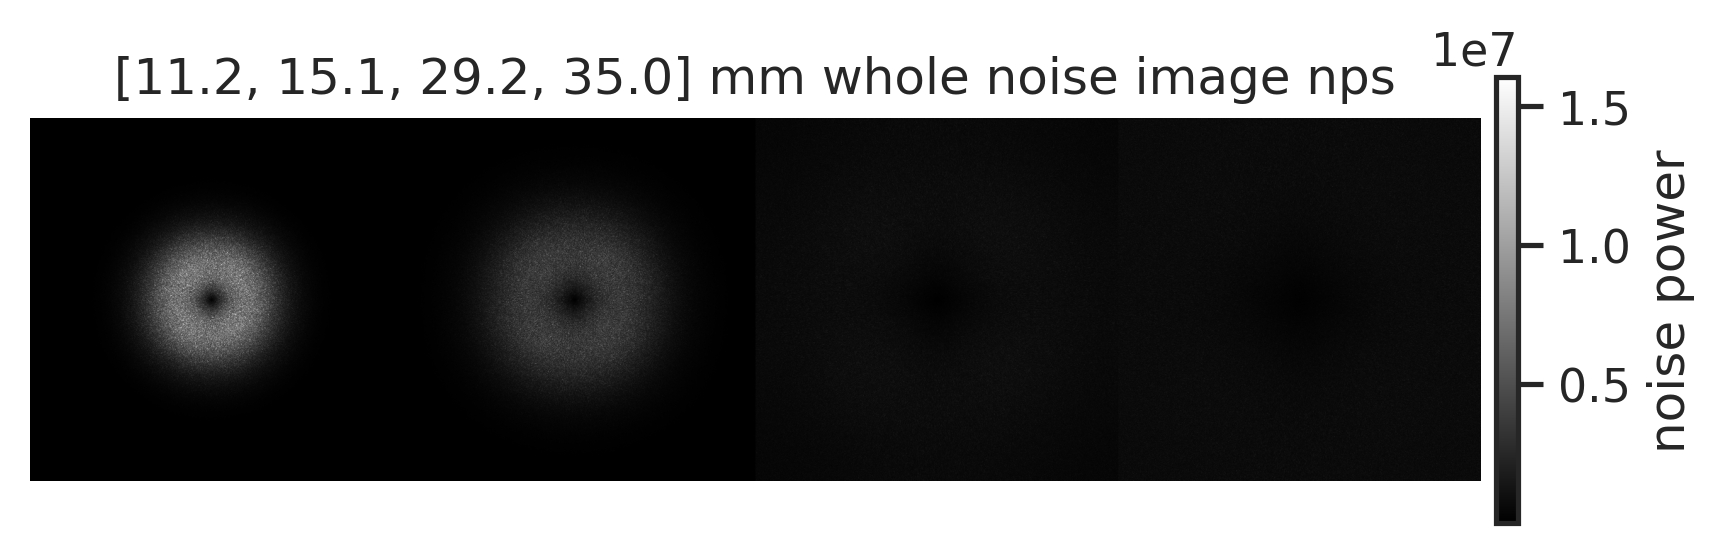

In [32]:
plt.subplots(1,1, dpi=300)
plt.imshow(np.concatenate(nps_images, axis=1), cmap='gray')
plt.axis('off')
plt.title(f'{diams} mm whole noise image nps')
plt.colorbar(fraction=0.015, pad=0.01, label='noise power')

 noise texture changes radially and azimuthally

## Look at representative patchesnoise pasnoise in C
T
 imnon-stationy, so by sampling noise from different parts of the image, central vs peripheral and different azimuthal locations shows differences in noiese textur

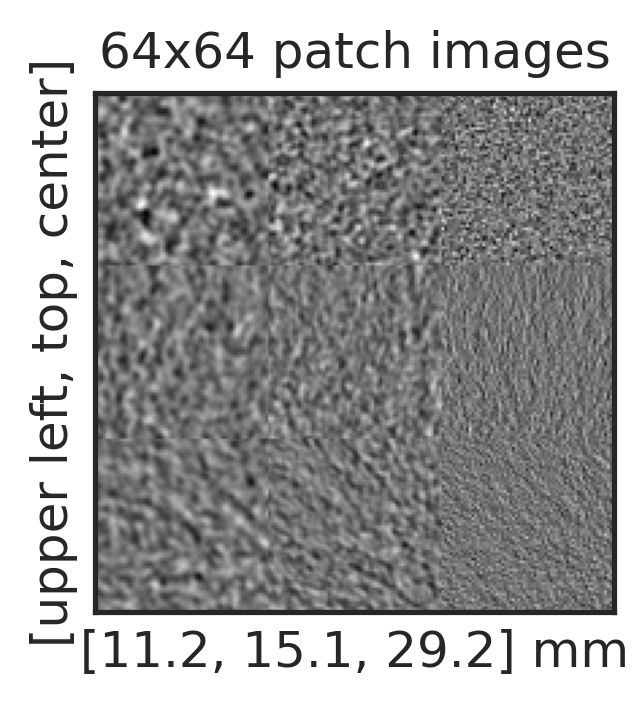

In [36]:
from make_noise_patches import make_noise_image_dict

def get_square_patch(img, center, patch_width=30):
    if img.ndim == 2: img = img[None, :, :]
    return img[:, center[0]-patch_width//2:center[0]+patch_width//2, center[1]-patch_width//2:center[1]+patch_width//2]

def get_patches(img, centers, patch_size=30):
    return {center: get_square_patch(img, center, patch_width=patch_size) for center in centers}

def plot_representative_noise_patches(datadir, patch_size=64):
    centers = [(256, 256), (50, 256), (110, 110)]
    noise_image_dict = make_noise_image_dict(datadir)
    corner_patches = [get_patches(noise_image_dict[d], centers=centers, patch_size=patch_size) for d in diams]

    corners= list(corner_patches[0].keys())
    f, axs = plt.subplots(1,1, dpi=300, figsize=(3,2.25))
    region_patches = np.concatenate([np.concatenate([p[c][0] for p in corner_patches], axis=1) for c in corners])
    axs.imshow(region_patches, cmap='gray')
    axs.set_title(f'{patch_size}x{patch_size} patch images')
    axs.set_xlabel(f'{diams} mm')
    axs.set_ylabel(f'[upper left, top, center]')
    axs.set_xticks([])
    axs.set_yticks([])
    return corner_patches, corners

patch_size = 64
corner_patches, corners = plot_representative_noise_patches(datadir, patch_size=patch_size)

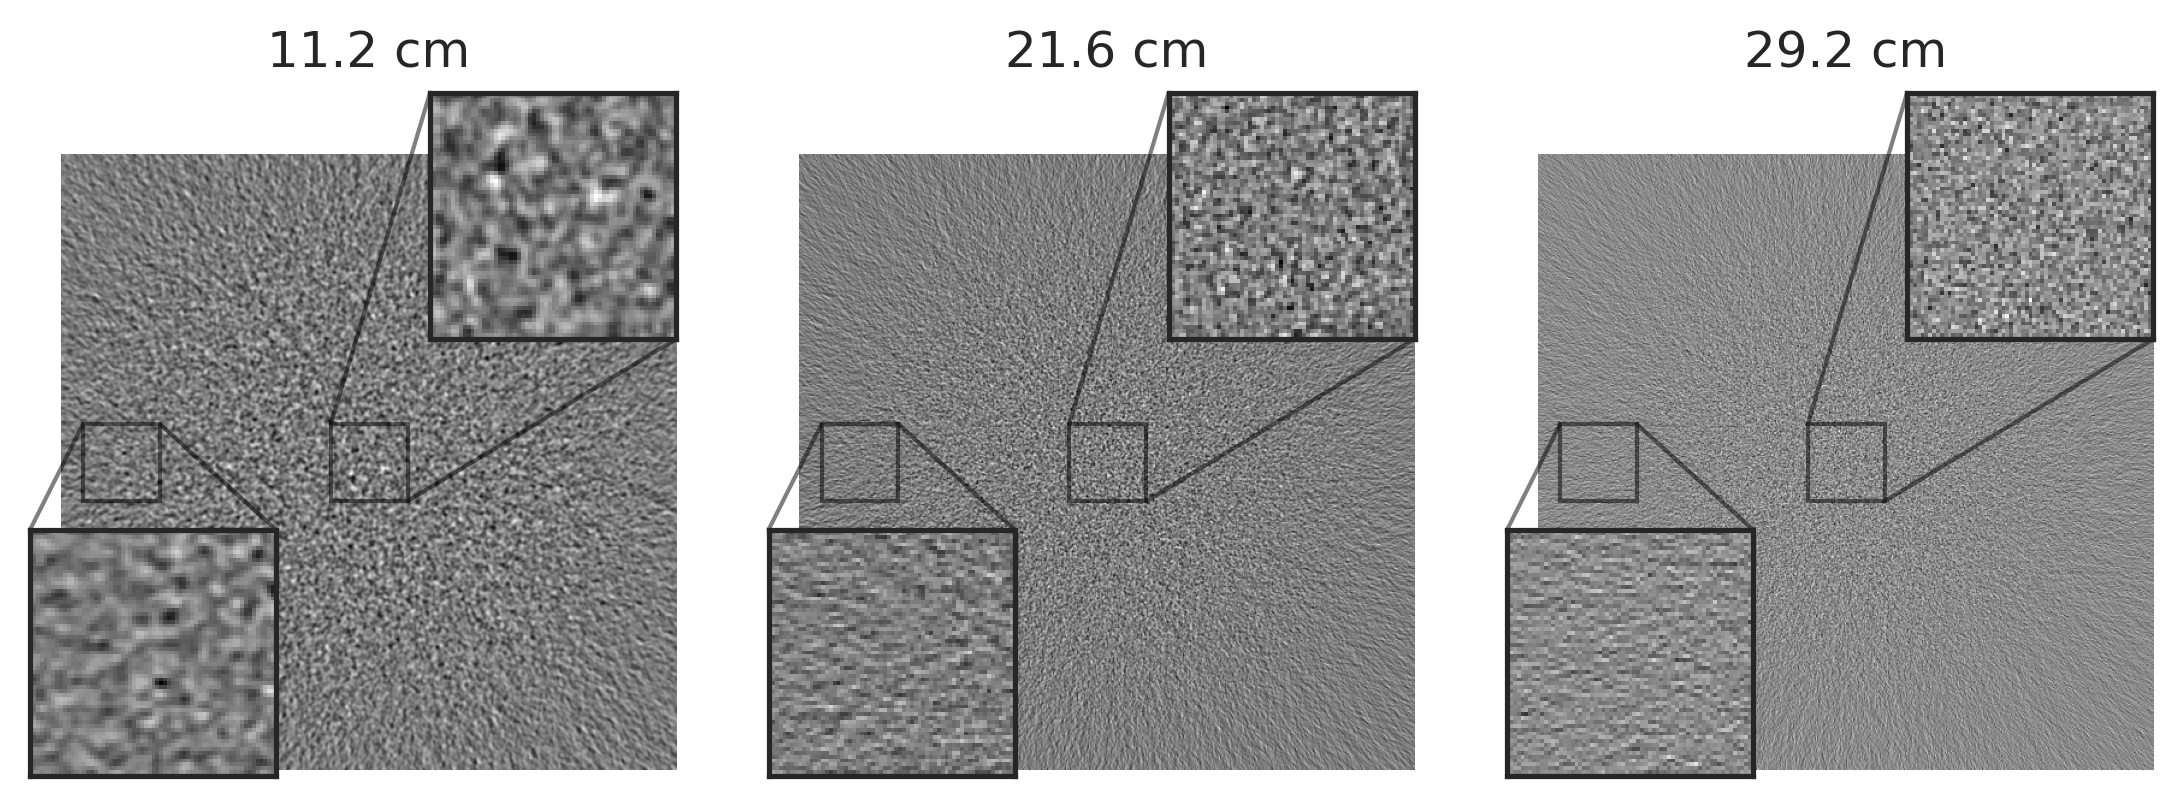

In [106]:
diams = [11.2, 21.6, 29.2]

f, axs = plt.subplots(1, len(diams), figsize=(9, 5), dpi=300)

for d, ax in zip(diams, axs.flatten()):
    noise_image = noise_image_dict[d][0]
    ax.imshow(noise_image, cmap='gray')

    # inset axes....
    axins_center = ax.inset_axes(
        [0.6, 0.7, 0.4, 0.4],
        xlim=(corners[0][0] - patch_size//2, corners[0][0] + patch_size//2), ylim=(corners[0][1] - patch_size//2, corners[0][1] + patch_size//2), xticklabels=[], yticklabels=[])
    axins_center.imshow(noise_image, cmap='gray')

    ax.indicate_inset_zoom(axins_center, edgecolor="black")

    axins_left = ax.inset_axes(
        [-0.05, -0.01, 0.4, 0.4],
        xlim=(corners[1][0] - patch_size//2, corners[1][0] + patch_size//2), ylim=(corners[1][1] - patch_size//2, corners[1][1] + patch_size//2), xticklabels=[], yticklabels=[])
    axins_left.imshow(noise_image, cmap='gray')

    ax.indicate_inset_zoom(axins_left, edgecolor="black")
    ax.axis('off')
    ax.set_title(f'{d} cm')

In [136]:
corners

[(256, 256), (50, 256), (110, 110)]

[]

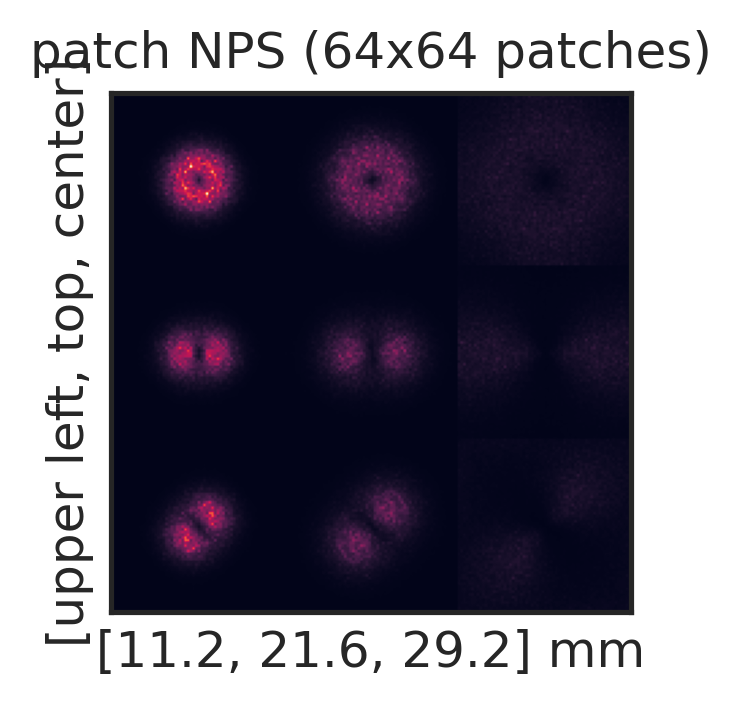

In [137]:
f, axs = plt.subplots(1,1, dpi=300, figsize=(3,2.25))
axs.imshow(np.concatenate([np.concatenate([compute_nps(p[c]) for p in corner_patches], axis=1) for c in corners]))
axs.set_title(f'patch NPS ({patch_size}x{patch_size} patches)')
axs.set_xlabel(f'{diams} mm')
axs.set_ylabel(f'[upper left, top, center]')
axs.set_xticks([])
axs.set_yticks([])

In [21]:
normalize = lambda x: x/x.sum()
patch_nps = [normalize(compute_nps(noise_patch_dict[x])) for x in diams]

Text(0.5, 1.0, '[11.2, 15.1, 29.2, 35.0] mm averaged patch nps (64x64 patches)')

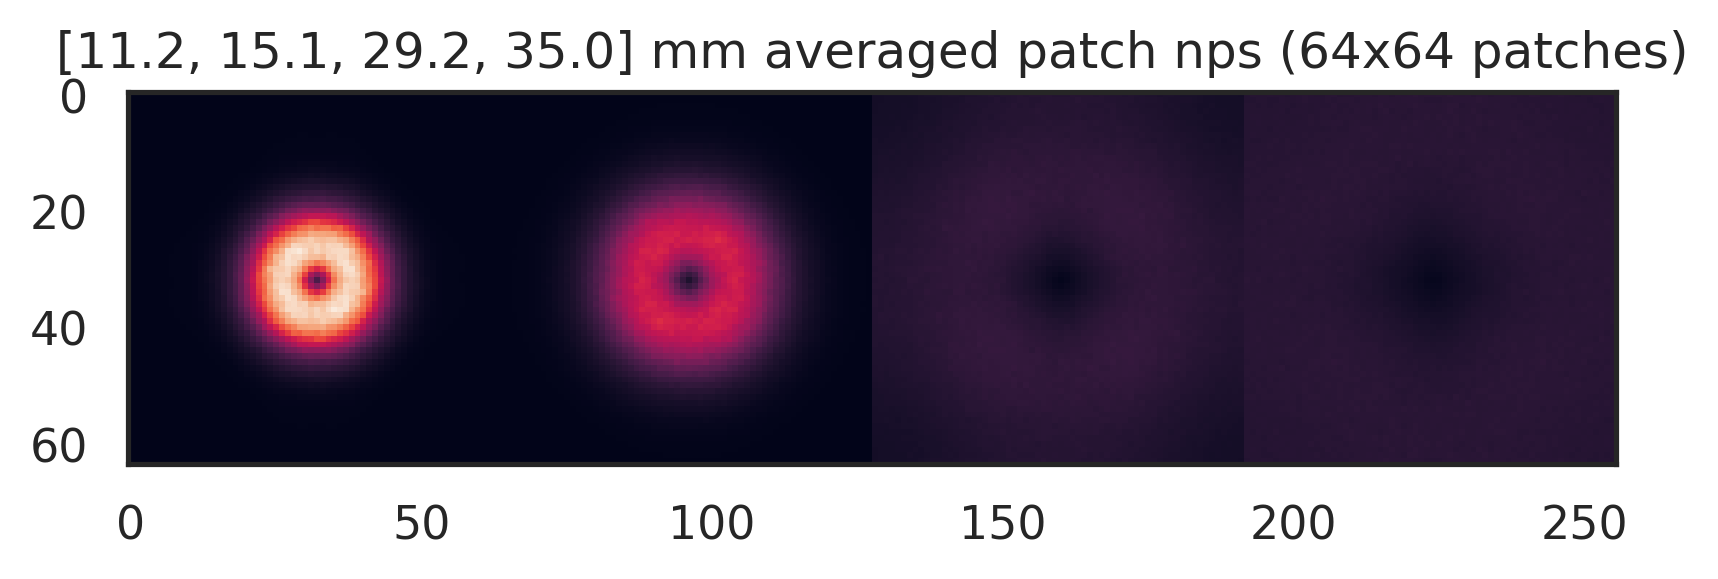

In [22]:
plt.subplots(1,1, dpi=300)
plt.imshow(np.concatenate(patch_nps, axis=1))
plt.title(f'{diams} mm averaged patch nps ({patch_size}x{patch_size} patches)')

Looking at slightly larger patch sizes, 6x64 was used t o trained REDCNN

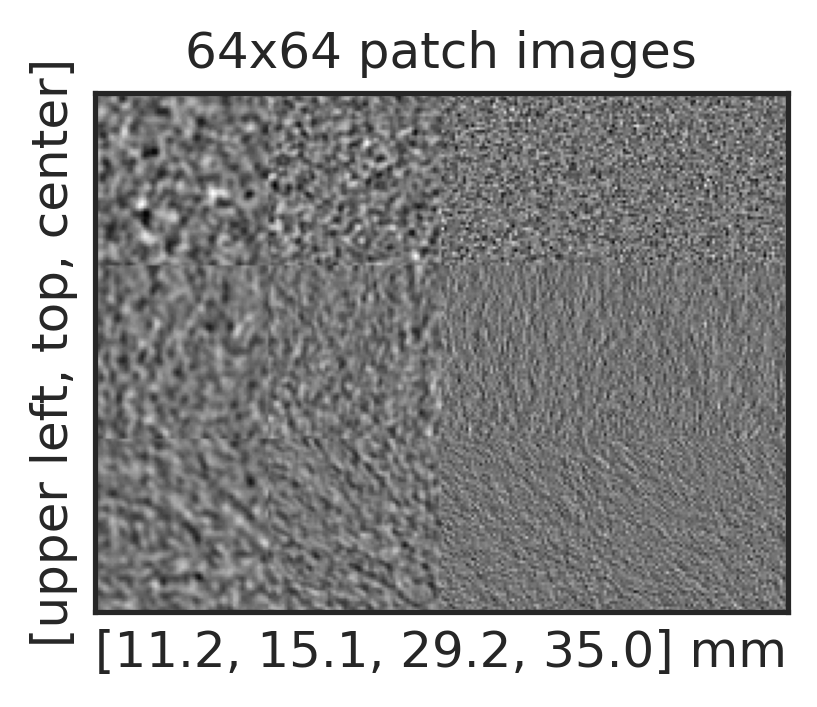

In [23]:
corner_patches, corners = plot_representative_noise_patches(datadir, patch_size=64)

In [143]:
corners[1]

(50, 256)

In [160]:
corners[1][0]-patch_size//2, corners[1][1]+patch_size//2

(18, 288)

In [162]:
patch_size

64

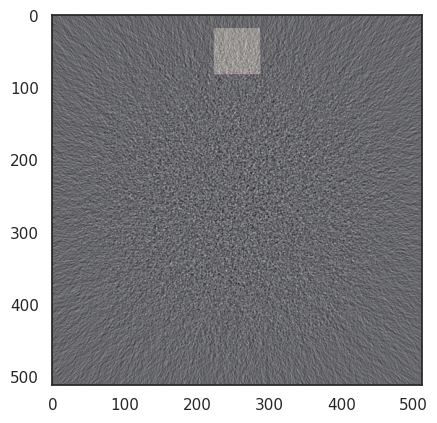

In [167]:
overlay = np.zeros_like(noise_image_dict[21.6].mean(axis=0))
overlay[corners[1][0]-patch_size//2:corners[1][0]+patch_size//2, corners[1][1]-patch_size//2:corners[1][1]+patch_size//2]=1
plt.imshow(noise_image_dict[21.6].mean(axis=0), cmap='gray')
plt.imshow(overlay, alpha=0.2)
plt.show()

In [155]:
corners[1]

(50, 256)

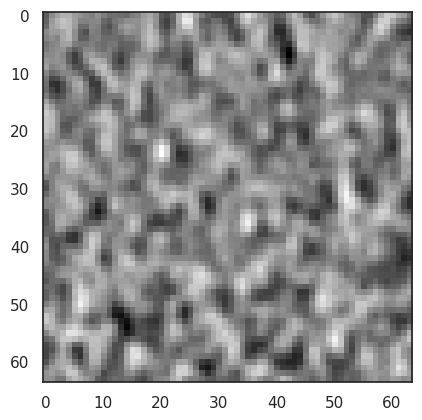

In [147]:
plt.imshow(corner_patches[0][corners[1]].mean(axis=0), cmap='gray')

[]

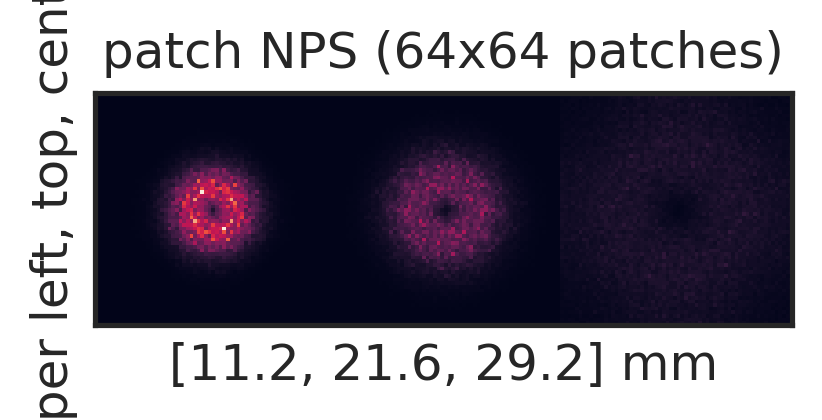

In [139]:
f, axs = plt.subplots(1,1, dpi=300, figsize=(3,2.25))
axs.imshow(np.concatenate([np.concatenate([compute_nps(p[c]) for p in corner_patches], axis=1) for c in corners]))
axs.set_title('patch NPS (64x64 patches)')
axs.set_xlabel(f'{diams} mm')
axs.set_ylabel(f'[upper left, top, center]')
axs.set_xticks([])
axs.set_yticks([])

In [26]:
normalize = lambda x: x/x.sum()
patch_nps = [normalize(compute_nps(noise_patch_dict[x])) for x in diams]

Text(0.5, 1.0, '[11.2, 15.1, 29.2, 35.0] mm averaged patch nps (64x64 patches)')

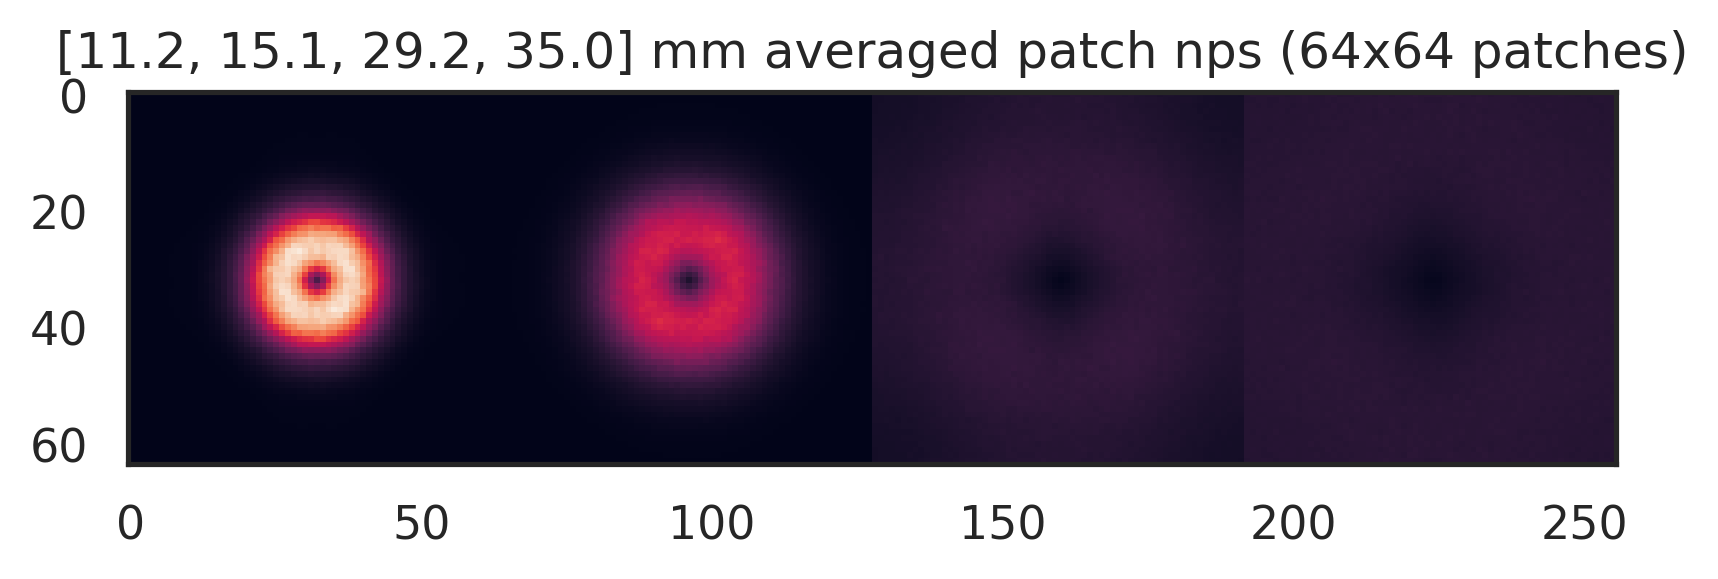

In [27]:
plt.subplots(1,1, dpi=300)
plt.imshow(np.concatenate(patch_nps, axis=1))
plt.title(f'{diams} mm averaged patch nps (64x64 patches)')

 how do these generated noise patches compare to the training dataset noise patches?

NameError: name 'train_nps' is not defined

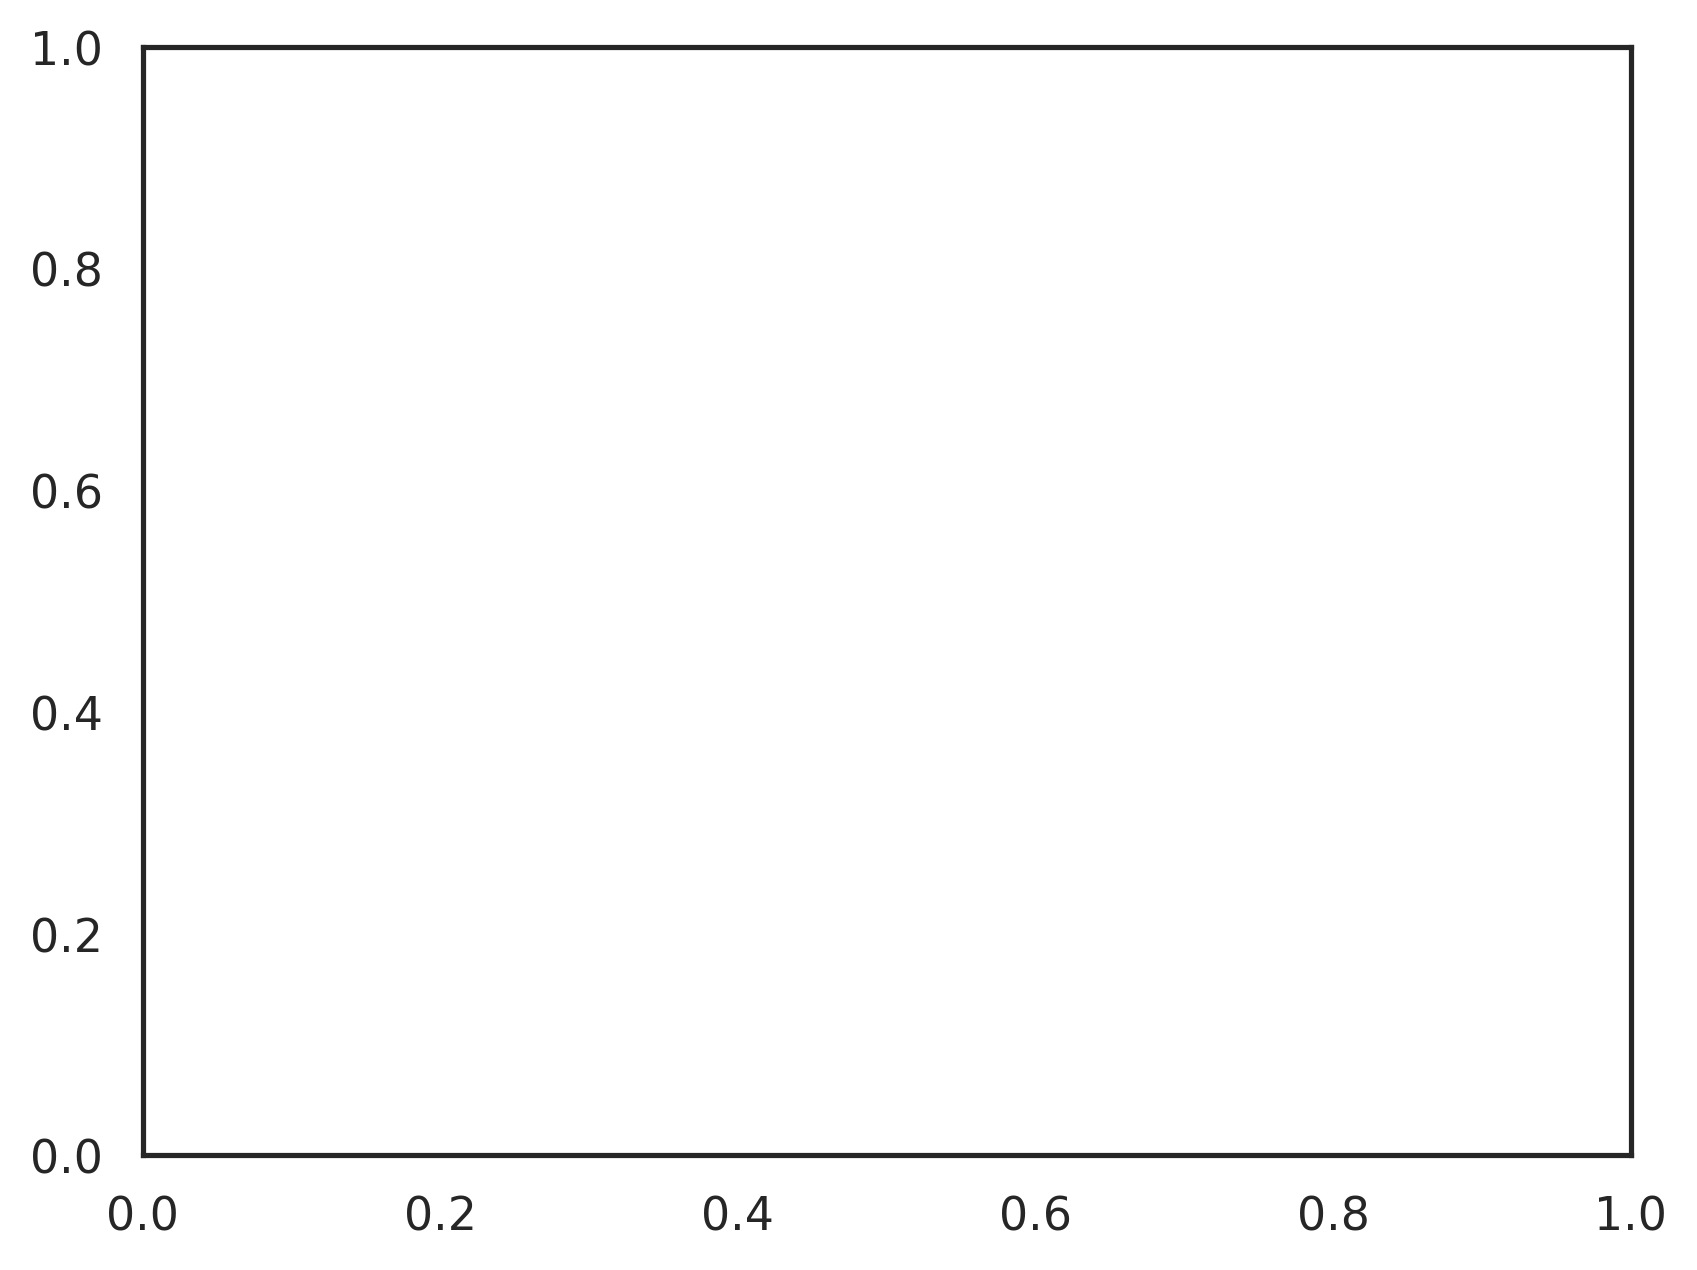

In [28]:
plt.subplots(1,1, dpi=300)
plt.imshow(np.concatenate([*patch_nps, normalize(train_nps)], axis=1))
for idx, d in enumerate([*diams, 'training']):
    plt.annotate(f'{d}', (10 + idx*30, 5))
plt.axis('off')

In [ ]:
f, axs = plt.subplots(figsize=(4.5, 4), dpi=150)
for nps, diam in zip([normalize(train_nps), *patch_nps], ['training', *diams]):
    axs.plot(radial_profile(nps), label=diam)
plt.xlabel('Spatial Frequency [1/px]')
plt.ylabel('Unnormalized NPS')
plt.legend(title='diameters [mm]')
plt.title('Generated Noise NPS vs. Training Patch NPS')

 now save the noise patches